## Notebook to test SfM pipeline

1. The repo is already a git submodule so just git submodule update --init --recursive. 
2. Follow the other steps to get the dependencies here: https://www.opensfm.org/docs/building.html, use this file for installing dependencies https://github.com/paulinus/opensfm-docker-base/blob/master/Dockerfile.python3.
    1. Heads up you'll want to do the pip install from within the lcnn conda environment (or another one).
3. To test your install run:
    1. bin/opensfm_run_all data/berlin from the open_sfm directory
    2. python -m http.server and hit the link here: http://localhost:8000/viewer/reconstruction.html#file=/data/berlin/reconstruction.meshed.json

In [58]:
import sys, cv2, os
import numpy as np
import matplotlib.pyplot as plt
# from yaml import load, dump
# try:
#     from yaml import CLoader as Loader, CDumper as Dumper
# except ImportError:
#     from yaml import Loader, Dumper
import yaml
sys.path.append('../OpenSfM')
from opensfm import features, config

In [59]:
file_path = "../data/lounge/"
conf = config.load_config(file_path+'config.yaml')

To test your own images 

1. run 'python video_converter.py --filename {filename} --n {save_every_n_images} --path {path_to_video}'
2. copy the config.yaml from OpenSfM/data/berlin to your {filename} directory

In [47]:
%%bash 
../OpenSfM/bin/opensfm extract_metadata ../data/lounge

2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_0.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_2.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_5.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_4.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_3.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_7.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_8.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_1.png
2020-04-15 20:12:28,254 INFO: Loading existing EXIF for img_6.png


In [48]:
%%bash 
../OpenSfM/bin/opensfm detect_features ../data/lounge

2020-04-15 20:12:29,322 INFO: Skip recomputing ROOT_HAHOG features for image img_2.png
2020-04-15 20:12:29,340 INFO: Skip recomputing ROOT_HAHOG features for image img_6.png
2020-04-15 20:12:29,352 INFO: Skip recomputing ROOT_HAHOG features for image img_5.png
2020-04-15 20:12:29,368 INFO: Skip recomputing ROOT_HAHOG features for image img_0.png
2020-04-15 20:12:29,371 INFO: Skip recomputing ROOT_HAHOG features for image img_3.png
2020-04-15 20:12:29,394 INFO: Skip recomputing ROOT_HAHOG features for image img_7.png
2020-04-15 20:12:29,429 INFO: Skip recomputing ROOT_HAHOG features for image img_4.png
2020-04-15 20:12:29,429 INFO: Skip recomputing ROOT_HAHOG features for image img_1.png
2020-04-15 20:12:29,459 INFO: Skip recomputing ROOT_HAHOG features for image img_8.png


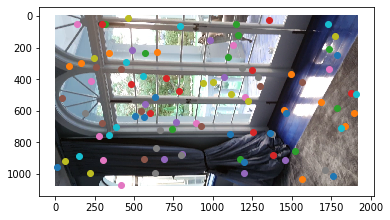

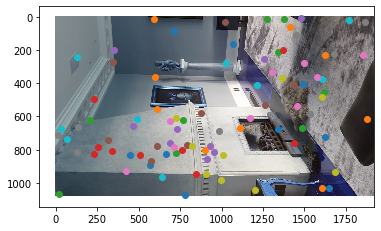

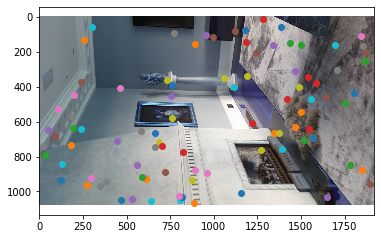

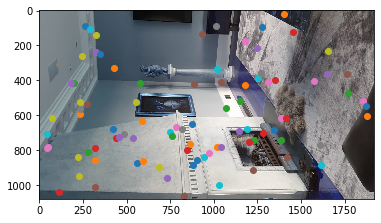

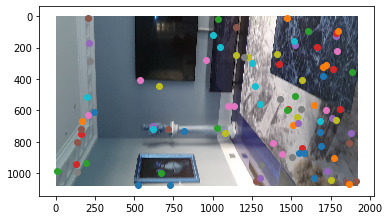

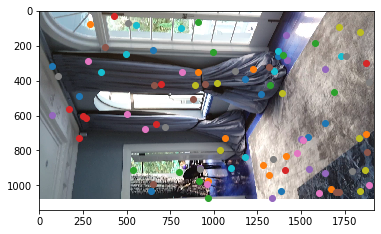

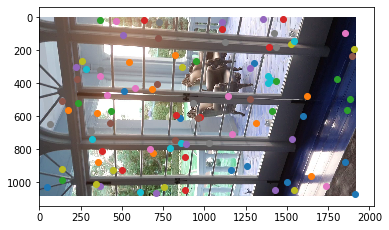

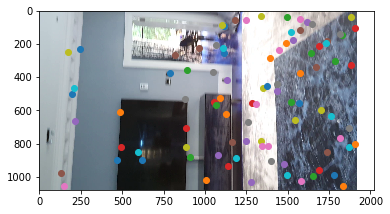

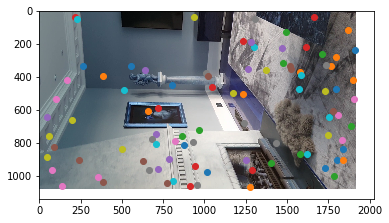

In [69]:
"""An Example of How to Load Pre-Detected features from the npz generated from:
                                    ../OpenSfM/bin/opensfm detect_features ../data/lounge"""
for filename in os.listdir(file_path+"features"):
    if filename.endswith(".npz"): 
#         fts = np.load(file_path+"features/"+filename) # ['points', 'descriptors', 'colors', 'OPENSFM_FEATURES_VERSION']
        fts = features.load_features(file_path+"features/"+filename, conf)
        points = fts[0]
        img_name = filename[:5]+'.png'
        img = cv2.imread(file_path+"images/"+img_name)
        plt.imshow(img)
        denorm_pts = features.denormalized_image_coordinates(points, 1920, 1080)
        for pt_i, (x, y) in enumerate(denorm_pts): 
            if (pt_i % 50) == 0:
                plt.scatter(x, y)
        plt.show()


In [62]:
"""An Example of How to Manually Detect Features: currently detects HAHOG features (whatever that is)"""
img = cv2.imread(file_path+"images/img_0.png")
point, des, col = features.extract_features(img, conf)

[[ 6.8828702e-02 -5.1242098e-02  5.0853430e-03  1.1185627e+02]
 [ 3.2557923e-01  2.3514825e-01  2.5653590e-03  6.9236511e+01]
 [ 8.3371699e-02  4.7193646e-02  6.2282723e-03 -9.3943604e+01]
 ...
 [-2.1926299e-01  8.7447196e-02  1.9091454e-03  5.6748955e+01]
 [-9.3787342e-02  1.7490727e-01  2.2505603e-03  4.5204044e+01]
 [-6.5818101e-02  1.5512124e-01  2.9385677e-03 -7.2590961e+00]]
